Problem Statement

This project builds a multiple linear regression model to predict house prices (MEDV) and identify the key factors that influence them using the Boston Housing dataset.

Import required libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Load the dataset using pandas

In [392]:
house = pd.read_csv ('BostonHousing 1.csv')
house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Inspection of dataset

In [393]:
# Display the first 5 rows of the dataset to understand its structure
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [394]:
# Display the last 5 rows of the dataset to understand its structure
house.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [395]:
# Get a summary of the dataset, including column names, data types, and missing values
house.info()
# Result : All data types are correct and there are no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [454]:
# Summary statistics for numeric columns
house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.465921,0.953873,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,2.475610,22.532806
std,0.483015,1.620831,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,0.539033,9.197104
min,0.006280,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.004302,5.000000
25%,0.075898,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,2.073162,17.025000
50%,0.205659,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,2.514464,21.200000
75%,0.933216,2.602690,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,2.887869,25.000000
max,1.704665,4.615121,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,3.662792,50.000000


Data cleaning

In [397]:
# Check for missing values in the dataset
house.isnull().sum ()
# Result: This confirms that no missing values were found in any column

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [398]:
# Check for duplicates in the dataset
house.duplicated().sum()
# Result: No duplicated records were found in dataset

np.int64(0)

Outlier Detection and Handling

In [399]:
# Detecting outliers in 'crim' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['crim'].quantile (0.25)
Q3 = house ['crim'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [400]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [452]:
# Filter the dataset to display rows where 'crim' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['crim'] < lower_bound) | (house ['crim'] > upper_bound)]
outlier

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [451]:
# Applying log1p transformation compresses these large values,reducing the influence of outliers on the regression model.

house['crim'] = np.log1p(house['crim'])

In [453]:
house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.006280,2.944439,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,1.788421,24.0
1,0.026587,0.000000,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,2.316488,21.6
2,0.026568,0.000000,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,1.615420,34.7
3,0.031360,0.000000,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,1.371181,33.4
4,0.064636,0.000000,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,1.845300,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.058973,0.000000,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,2.367436,22.4
502,0.043323,0.000000,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,2.310553,20.6
503,0.057311,0.000000,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,1.893112,23.9
504,0.098931,0.000000,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,2.012233,22.0


In [403]:
# Detecting outliers in 'zn' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['zn'].quantile (0.25)
Q3 = house ['zn'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [404]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [405]:
# Filter the dataset to display rows where 'zn' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['zn'] < lower_bound) | (house ['zn'] > upper_bound)]
outlier

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
39,0.027255,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32,30.8
40,0.033038,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
54,0.013508,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
55,0.013025,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
56,0.020342,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.076498,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
352,0.069936,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
353,0.016946,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
354,0.042111,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2


In [406]:
# Applying log1p transformation compresses these large values,reducing the influence of outliers on the regression model
house['zn'] = np.log1p(house['zn'])

crim and zn were log-transformed due to heavy right skew and large value dispersion, which could otherwise distort the linear regression model.

In [407]:
# Detecting outliers in 'indus' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['indus'].quantile (0.25)
Q3 = house ['indus'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [408]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [409]:
# Filter the dataset to display rows where 'indus' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['indus'] < lower_bound) | (house ['indus'] > upper_bound)]
outlier
# There are no outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [410]:
# Detecting outliers in 'chas' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['chas'].quantile (0.25)
Q3 = house ['chas'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [411]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [412]:
# Filter the dataset to display rows where 'chas' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['chas'] < lower_bound) | (house ['chas'] > upper_bound)]
outlier
# chas is a binary variable (0/1), so no outlier handling is applied

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
142,1.463498,0.000000,19.58,1,0.8710,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
152,0.754515,0.000000,19.58,1,0.8710,5.012,88.0,1.6102,5,403,14.7,343.28,12.12,15.3
154,0.881223,0.000000,19.58,1,0.8710,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
155,1.511827,0.000000,19.58,1,0.8710,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
160,0.821303,0.000000,19.58,1,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
162,1.041608,0.000000,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,0.923870,0.000000,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
208,0.127399,0.000000,10.59,1,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
209,0.361660,0.000000,10.59,1,0.4890,5.344,100.0,3.8750,4,277,18.6,396.90,23.09,20.0
210,0.160808,0.000000,10.59,1,0.4890,5.960,92.1,3.8771,4,277,18.6,393.25,17.27,21.7


In [413]:
# Detecting outliers in 'nox' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['nox'].quantile (0.25)
Q3 = house ['nox'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [414]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [415]:
# Filter the dataset to display rows where 'nox' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['nox'] < lower_bound) | (house ['nox'] > upper_bound)]
outlier
# There are no outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [416]:
# Detecting outliers in 'rm' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['rm'].quantile (0.25)
Q3 = house ['rm'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [417]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [418]:
# Filter the dataset to display rows where 'rm' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['rm'] < lower_bound) | (house ['rm'] > upper_bound)]
outlier
# rm is approximately normally distributed with realistic high values so no outlier handling was applied.

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
97,0.114069,0.000000,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
98,0.078691,0.000000,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
162,1.041608,0.000000,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,0.923870,0.000000,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,1.102003,0.000000,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
180,0.063801,0.000000,2.46,0,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
186,0.054507,0.000000,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
195,0.013716,4.394449,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
203,0.034498,4.564348,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
204,0.019891,4.564348,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0


In [419]:
# Detecting outliers in 'age' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['age'].quantile (0.25)
Q3 = house ['age'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [420]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [421]:
# Filter the dataset to display rows where 'age' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['age'] < lower_bound) | (house ['age'] > upper_bound)]
outlier
# There are no outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [422]:
# Detecting outliers in 'dis' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['dis'].quantile (0.25)
Q3 = house ['dis'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [423]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [424]:
# Filter the dataset to display rows where 'dis' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['dis'] < lower_bound) | (house ['dis'] > upper_bound)]
outlier
# dis shows mild skew with a few realistic high values; therefore, no outlier handling was performed

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
351,0.076498,4.110874,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
352,0.069936,4.110874,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
353,0.016946,4.510860,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
354,0.042111,4.394449,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
355,0.101283,4.394449,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6


In [425]:
# Detecting outliers in 'rad' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['rad'].quantile (0.25)
Q3 = house ['rad'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [426]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [427]:
# Filter the dataset to display rows where 'rad' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['rad'] < lower_bound) | (house ['rad'] > upper_bound)]
outlier
# There are no outliers

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [428]:
# Detecting outliers in 'tax' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['tax'].quantile (0.25)
Q3 = house ['tax'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [429]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [430]:
# Filter the dataset to display rows where 'tax' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['tax'] < lower_bound) | (house ['tax'] > upper_bound)]
outlier

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [431]:
# Detecting outliers in 'ptratio' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['ptratio'].quantile (0.25)
Q3 = house ['ptratio'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [432]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [433]:
# Filter the dataset to display rows where 'ptratio' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['ptratio'] < lower_bound) | (house ['ptratio'] > upper_bound)]
outlier
# ptratio has mild skew with a few realistic low values, so no outlier treatment was applied

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
196,0.039326,4.394449,1.52,0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
197,0.045604,4.394449,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3
198,0.036987,4.394449,1.52,0,0.404,7.274,38.3,7.3090,2,329,12.6,392.20,6.62,34.6
257,0.477190,3.044522,3.97,0,0.647,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
258,0.508930,3.044522,3.97,0,0.647,7.333,100.0,1.8946,5,264,13.0,383.29,7.79,36.0
259,0.504797,3.044522,3.97,0,0.647,6.842,100.0,2.0107,5,264,13.0,391.93,6.90,30.1
260,0.431854,3.044522,3.97,0,0.647,7.203,81.8,2.1121,5,264,13.0,392.80,9.59,33.8
261,0.427957,3.044522,3.97,0,0.647,7.520,89.4,2.1398,5,264,13.0,388.37,7.26,43.1
262,0.418802,3.044522,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8
263,0.601722,3.044522,3.97,0,0.647,7.327,94.5,2.0788,5,264,13.0,393.42,11.25,31.0


In [434]:
# Detecting outliers in 'b' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['b'].quantile (0.25)
Q3 = house ['b'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [435]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Filter the dataset to display rows where 'b' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['b'] < lower_bound) | (house ['b'] > upper_bound)]
outlier
# b shows left skewed due to its formula-based distribution, and the values are valid, so no outlier trandformation was applied

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
18,0.589291,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
25,0.610059,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51,13.9
27,0.670784,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8
32,0.870452,0.0,8.14,0,0.538,5.950,82.0,3.9900,4,307,21.0,232.60,27.71,13.2
34,0.960430,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,21.0,248.31,20.34,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,1.563390,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
467,1.690516,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,331.29,21.32,19.1
475,2.000550,0.0,18.10,0,0.584,6.162,97.4,2.2060,24,666,20.2,302.76,24.10,13.3
489,0.168366,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0


In [437]:
# Detecting outliers in 'lstat' using the IQR method

# Calculate the first quartile (Q1) and third quartile (Q3)
# These represent the 25th and 75th percentiles of the data
Q1 = house ['lstat'].quantile (0.25)
Q3 = house ['lstat'].quantile (0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

In [438]:
# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Filter the dataset to display rows where 'lstat' falls outside the bounds
# These rows are potential outliers
outlier = house [(house ['lstat'] < lower_bound) | (house ['lstat'] > upper_bound)]
outlier


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
141,0.966467,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41,14.4
373,2.493875,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8
374,2.970322,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8
387,3.161124,0.0,18.10,0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99,7.4
412,2.986237,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
414,3.844731,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0
438,2.686357,0.0,18.10,0,0.740,5.935,87.9,1.8206,24,666,20.2,68.95,34.02,8.4


In [440]:
# Applying log1p transformation compresses these large values,reducing the influence of outliers on the regression model
house['lstat'] = np.log1p(house['lstat'])

Regression analysis

In [441]:
# Define predictor and target variable for regression
X = house.drop('medv', axis=1)
y = house ['medv']

In [442]:
# Split the dataset into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [443]:
# Train the linear regression model using the training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [444]:
# Generate predictions on the testing data using the trained model
y_pred = model.predict(X_test)

In [445]:
# Evaluate model performance using R-squared and Root Mean Squared Error
from sklearn.metrics import r2_score, root_mean_squared_error

print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R-squared: 0.7343857459355537
RMSE: 4.413445152242524


Model Performance

R² = 0.73
The model explains 73% of the variation in house prices, indicating a strong relationship between the features and MEDV.

RMSE = 4.41
On average, the model’s predictions differ from the actual house prices by about 4.41 units.

The model has good predictive performance with relatively low error and a high proportion of explained variance.

In [446]:
# Extract and display the regression coefficient
coef_house = pd.DataFrame({"Features": X.columns, "Coeffients":model.coef_})
coef_house

,Features,Coeffients
0,crim,-1.472756
1,zn,0.223568
2,indus,0.038744
3,chas,2.307176
4,nox,-13.163310
5,rm,2.931960
6,age,0.017874
7,dis,-1.268711
8,rad,0.313366
9,tax,-0.009470


Coefficient Interpretation

The coefficients show how each feature affects house price (MEDV) while other variables remain constant.

Positive values → increase price

Negative values → decrease price

Key Drivers

RM → Strong positive effect (more rooms → higher price)

LSTAT (log) → Strong negative effect (higher lower-status % → lower price)

NOX → Higher pollution reduces price

PTRATIO → Higher pupil–teacher ratio lowers price

CHAS → Houses near the river are more expensive

CRIM (log) → Higher crime lowers price

Summary

House prices increase with better living conditions (more rooms, better location) and decrease with pollution, crime, and socioeconomic disadvantage.
The model explains 73% of price variation, indicating good predictive performance.

In [448]:
# Predicting a new house

new_house = pd.DataFrame({'crim':[np.log1p (0.3)], 'zn':[np.log1p (13.0)], 'indus':[.214], 'chas':[0], 'nox':[0.7], 'rm':[7.2], 'age':[70.1],
                          'dis':[5.2], 'rad':[6], 'tax':[400], 'ptratio' :[19.3],
                          'b':[400.1],'lstat':[np.log1p (30.2)]})
new_house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.262364,2.639057,0.214,0,0.7,7.2,70.1,5.2,6,400,19.3,400.1,3.440418


In [449]:
prediction = model.predict(new_house)
prediction

array([11.21321292])

New House Prediction

The model predicts a house price of 11.21.

This value is based on the input features provided and follows the same patterns learned from the training data.

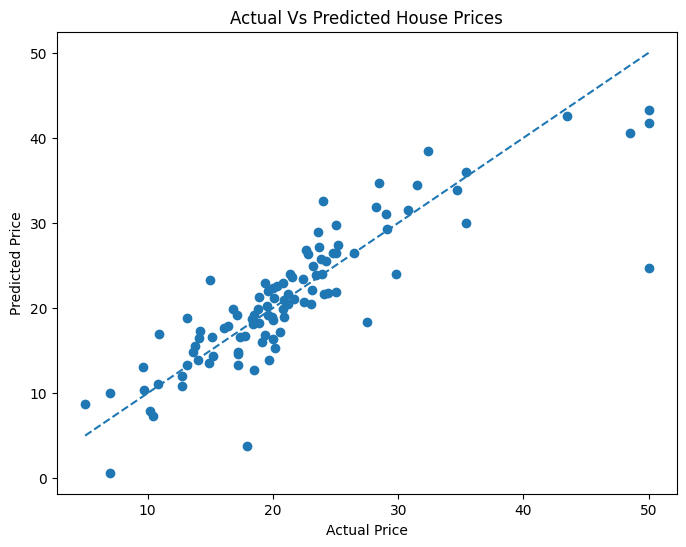

In [450]:
# visualization
plt.figure(figsize= (8, 6))
plt.scatter(y_test,y_pred)

plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], linestyle= "--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted House Prices")
plt.show()

Actual vs Predicted Prices

The points are close to the diagonal line, showing that the predicted prices are close to the actual prices.

This indicates that the model makes good predictions with only small errors.

Conclusion

The multiple linear regression model performed well, explaining most of the variation in house prices (R² = 0.73) with low prediction error (RMSE = 4.41).

Log transformation of skewed features improved the model, and the predictions closely matched the actual values.

Overall, the model is effective for predicting house prices using the available features.